# Students Performance Analysis

# 📦 Importing Required Libraries
In this section, we import the necessary Python libraries that will be used throughout the exploratory data analysis (EDA) of the student exam scores dataset. Each library serves a specific purpose in data handling, analysis, and visualization:

`pandas`: Used for data manipulation and analysis. It provides data structures like DataFrames that make it easy to handle tabular data.

`numpy`: Offers support for numerical operations and array manipulations.

`matplotlib.pyplot`: A core library for creating static, animated, and interactive visualizations in Python.

`seaborn`: Built on top of Matplotlib, it provides a high-level interface for drawing attractive and informative statistical graphics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 📂 Loading the Dataset
In this section, we load the student exam scores dataset into a pandas DataFrame for analysis.

The dataset is expected to contain records of individual students along with their scores across various exams or subjects. This step is critical as it serves as the foundation for all subsequent analysis.

We use the `pandas.read_csv()` function to read the dataset, which is typically stored in CSV (Comma-Separated Values) format. After loading, we take a look at the dimensions of the data using the `.shape` attribute, see the list of columns and display the first few rows using the `.head()` method to get an initial look at the structure and contents of the data. Post this, we have a check the presence of NaNs in the features using the `.info()` method followed by some statistics using the `.describe()`

In [2]:
df = pd.read_csv('data_set.csv')

In [3]:
# Dataset dimensions and features
print("Dataset shape:", df.shape)
print("Dataset columns:", df.columns.tolist())

Dataset shape: (1040, 19)
Dataset columns: ['student_id', 'age', 'gender', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'part_time_job', 'attendance_percentage', 'sleep_hours', 'diet_quality', 'exercise_frequency', 'parental_education_level', 'internet_quality', 'mental_health_rating', 'extracurricular_participation', 'exam_score', 'country', 'commute', 'zipcode']


In [4]:
# First 5 Rows of the Dataset
print("First 5 rows of the dataset:\n", df.head())

First 5 rows of the dataset:
   student_id   age  gender  study_hours_per_day  social_media_hours  \
0      S1000  23.0  Female                  0.0                 1.2   
1      S1001  20.0  Female                  6.9                 2.8   
2      S1002  21.0    Male                  1.4                 3.1   
3      S1003  23.0  Female                  1.0                 3.9   
4      S1004  19.0  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                 6.0        

In [5]:
# Dataset feature information
print("Dataset feature details:")
df.info()

Dataset feature details:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1040 non-null   object 
 1   age                            1037 non-null   float64
 2   gender                         1036 non-null   object 
 3   study_hours_per_day            1033 non-null   float64
 4   social_media_hours             1036 non-null   float64
 5   netflix_hours                  1035 non-null   float64
 6   part_time_job                  1036 non-null   object 
 7   attendance_percentage          1033 non-null   float64
 8   sleep_hours                    1031 non-null   float64
 9   diet_quality                   1035 non-null   object 
 10  exercise_frequency             1036 non-null   float64
 11  parental_education_level       937 non-null    object 
 12  internet_quality       

In [6]:
# Dataset Description which includes count, mean, std, min, 25%, 50%, 75%, max
print("Dataset description:\n", df.describe())

Dataset description:
                age  study_hours_per_day  social_media_hours  netflix_hours  \
count  1037.000000          1033.000000         1036.000000    1035.000000   
mean     20.505304             3.536786            2.515927       1.834589   
std       2.306450             1.475551            1.172910       1.090712   
min      17.000000             0.000000            0.000000       0.000000   
25%      19.000000             2.500000            1.700000       1.000000   
50%      20.000000             3.500000            2.500000       1.800000   
75%      23.000000             4.500000            3.300000       2.600000   
max      24.000000             8.300000            7.200000       5.400000   

       attendance_percentage  sleep_hours  exercise_frequency  \
count            1033.000000  1031.000000         1036.000000   
mean               84.004840     6.469253            3.038610   
std                 9.538596     1.236522            2.016467   
min            

In [7]:
# Dataset Description for Object Type Columns
print("Dataset description for object type columns:\n", df.describe(include=['object']))

Dataset description for object type columns:
        student_id  gender part_time_job diet_quality parental_education_level  \
count        1040    1036          1036         1035                      937   
unique       1026       3             2            3                        3   
top         S1705  Female            No         Fair              High School   
freq            2     495           809          447                      401   

       internet_quality extracurricular_participation country commute  
count              1032                          1034    1035     122  
unique                3                             2       1       1  
top                Good                            No     USA     Bus  
freq                455                           701    1035     122  


# 🧹 Data Preprocessing: Cleaning and Handling Missing Values
In this section, we perform data cleaning tasks, focusing on handling missing values and removing irrelevant or redundant columns that won't contribute to our analysis.

Key Steps:
1. Identify issues in the dataset and the nature of cleanup required before the dataset can be used for analysis
    - Getting counts of NaNs/missing data present in the dataset
    - Use boxplots to identify the presence of outliers
<br><br>
2. Handling Missing Values:
    - For numerical columns, we fill missing values (NaN) with the median. The median is chosen over the mean because it is more robust to outliers and skewed data, providing a more accurate representation of central tendency.
    - For categorical columns, we fill missing values with the mode (the most frequent category). This is a reasonable approach for handling missing categorical data since it maintains the overall distribution.
    - For columns with a significant proportion of missing values, we may opt to fill with 0 or the mode, depending on the nature of the column.
    - Observations with a missing exam score will be dropped as this is the target variable and needs to be present
<br><br>
3. Dropping Irrelevant or Redundant Columns:
    - Columns that do not contribute meaningful insights to the analysis or are not relevant to the scope of our investigation (such as IDs or any unnecessary metadata) will be dropped to avoid clutter and maintain focus.
<br><br>
4. Handling duplicate observations:
    - Observations that are duplicates are not relevant to this analysis and hence are being dropped from the dataset

In [8]:
# Check for missing values in the dataset
print(df.isnull().sum())

student_id                         0
age                                3
gender                             4
study_hours_per_day                7
social_media_hours                 4
netflix_hours                      5
part_time_job                      4
attendance_percentage              7
sleep_hours                        9
diet_quality                       5
exercise_frequency                 4
parental_education_level         103
internet_quality                   8
mental_health_rating               8
extracurricular_participation      6
exam_score                         4
country                            5
commute                          918
zipcode                          373
dtype: int64


Checking for outliers in numerical columns:


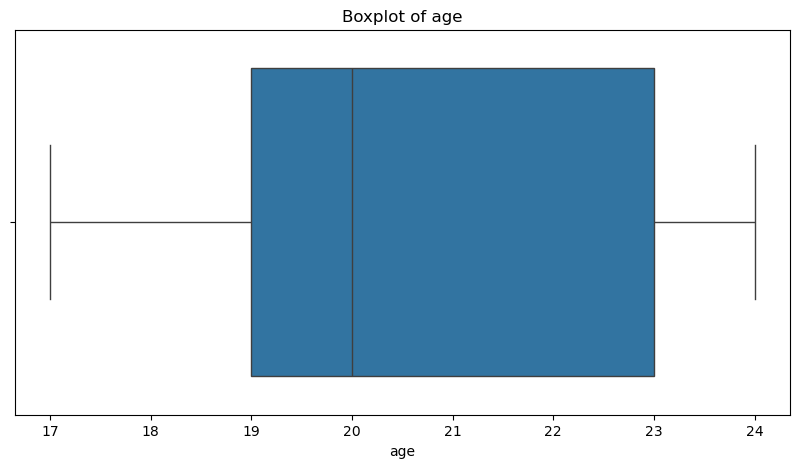

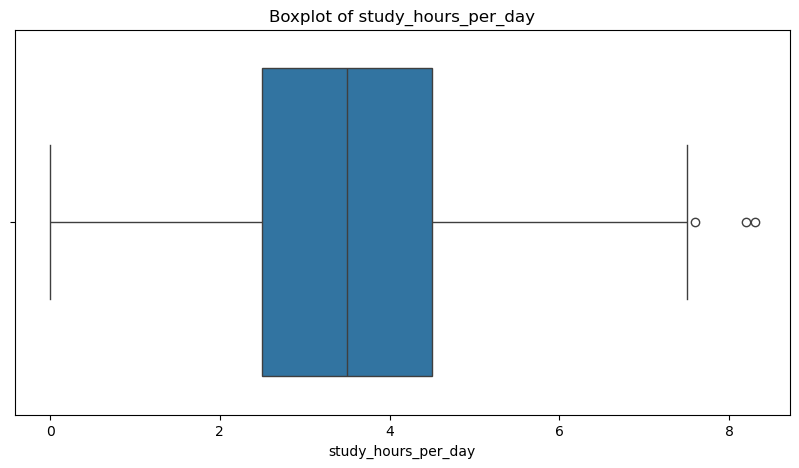

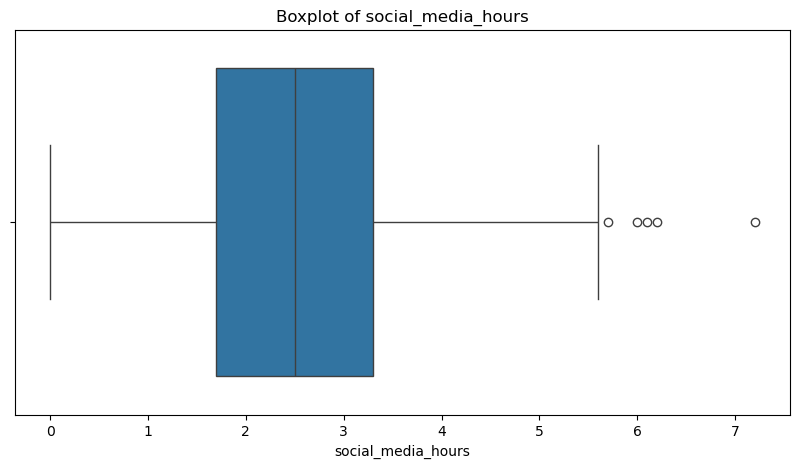

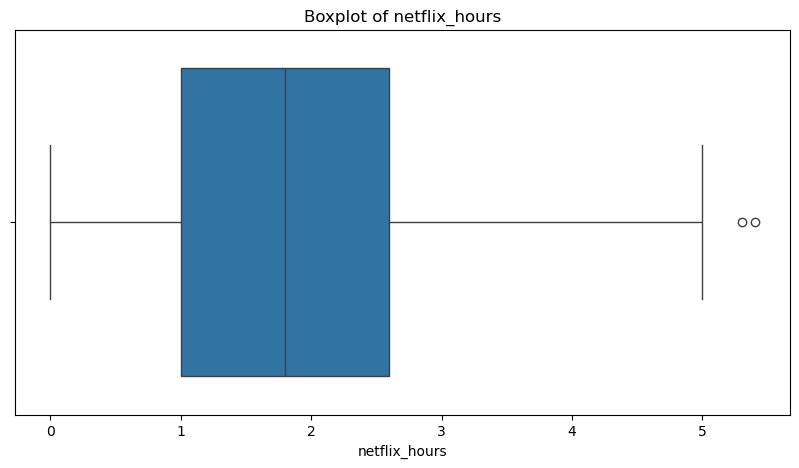

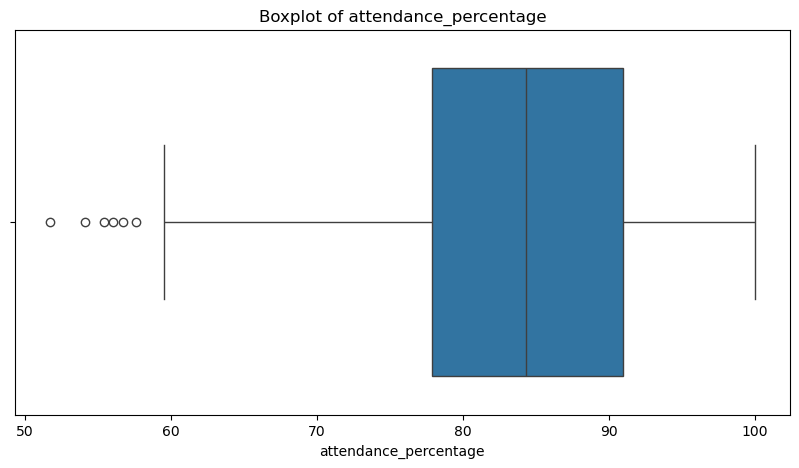

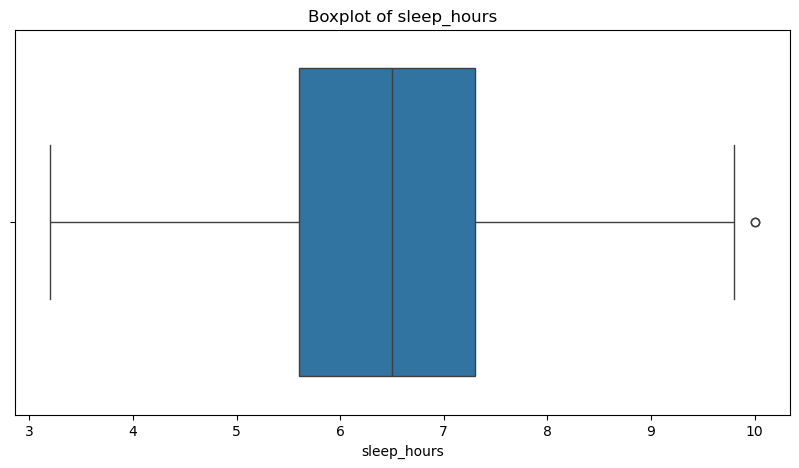

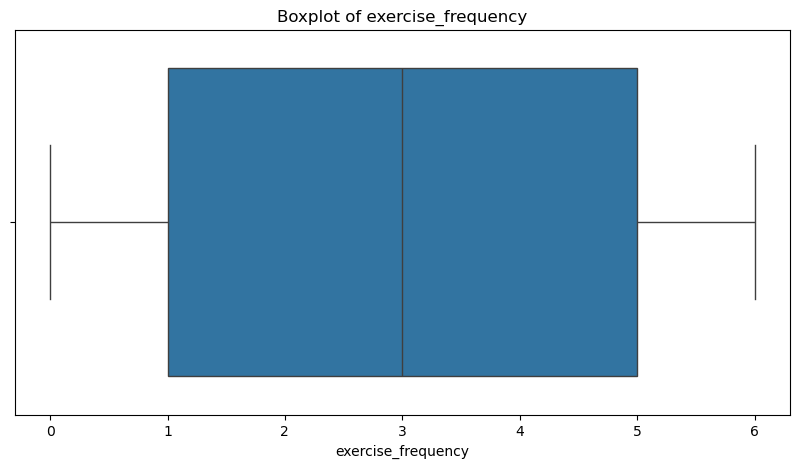

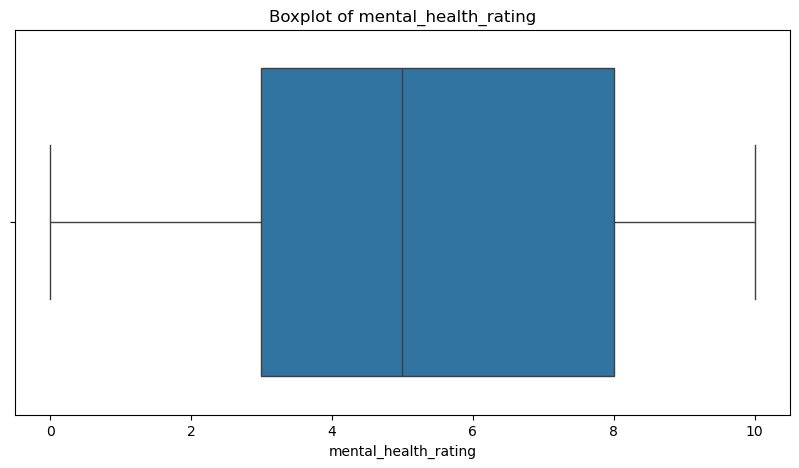

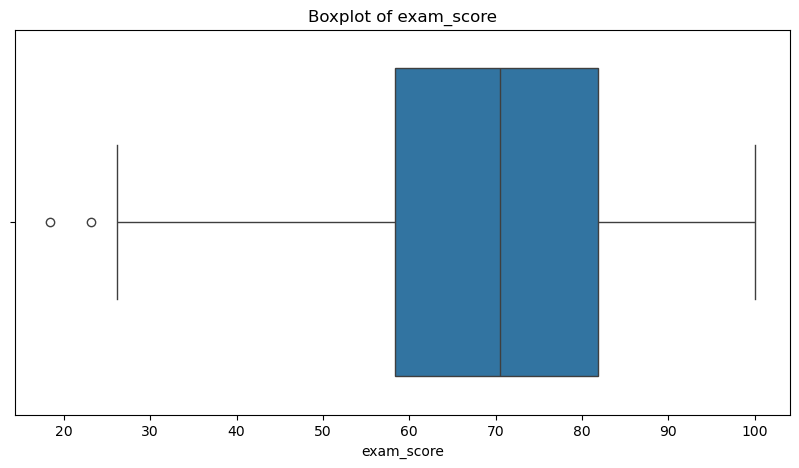

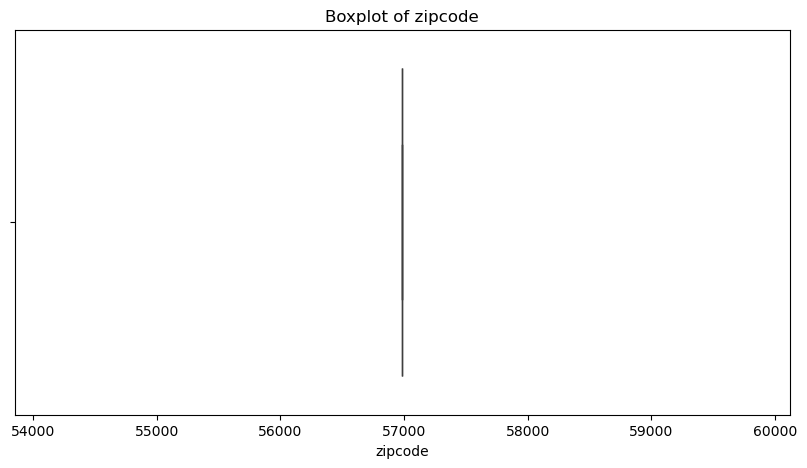

In [9]:
# Check for outliers in the dataset
print("Checking for outliers in numerical columns:")
numerical_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]

# Drawing box plots for numerical columns to visualize outliers
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [10]:
# - For numerical columns, we will fill missing values with the median (more robust to outliers than the mean).

df['age'] = df['age'].fillna(df['age'].mean())
df['sleep_hours'] = df['sleep_hours'].fillna(df['sleep_hours'].mean()) # a small outlier is present, but we can still use the mean for simplicity.
df['mental_health_rating'] = df['mental_health_rating'].fillna(df['mental_health_rating'].median())

# For columns with outliers, we will fill missing values with the median to avoid skewing the data.
df['attendance_percentage'] = df['attendance_percentage'].fillna(df['attendance_percentage'].median())
df['study_hours_per_day'] = df['study_hours_per_day'].fillna(df['study_hours_per_day'].median())
df['social_media_hours'] = df['social_media_hours'].fillna(df['social_media_hours'].median())
df['netflix_hours'] = df['netflix_hours'].fillna(df['netflix_hours'].median())

# For columns with a lot of missing values, we will fill them with 0 or the mode.
df['exercise_frequency'] = df['exercise_frequency'].fillna(0)

# For the 'zipcode' column, we will fill missing values with the mode (most frequent value) since it is categorical.
df['zipcode'] = df['zipcode'].fillna(df['zipcode'].mode()[0])

# - For categorical columns, we will fill missing values with the mode (most frequent value).
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
df['part_time_job'] = df['part_time_job'].fillna(df['part_time_job'].mode()[0])
df['diet_quality'] = df['diet_quality'].fillna(df['diet_quality'].mode()[0])
df['parental_education_level'] = df['parental_education_level'].fillna(df['parental_education_level'].mode()[0])
df['internet_quality'] = df['internet_quality'].fillna(df['internet_quality'].mode()[0])
df['extracurricular_participation'] = df['extracurricular_participation'].fillna(df['extracurricular_participation'].mode()[0])
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['commute'] = df['commute'].fillna(df['commute'].mode()[0])

In [11]:
# Drop columns that are not useful for analysis as these columns contains no variations
df.drop(columns=['zipcode', 'country', 'commute'], inplace=True)

In [12]:
# Check for duplicates in the dataset
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 14


In [13]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [14]:
# Drop rows where 'exam_score' is NaN
df.dropna(subset=['exam_score'], inplace=True)

In [15]:
# Check the shape of the dataset after cleaning
print("Dataset shape after cleaning:", df.shape)

Dataset shape after cleaning: (1022, 16)


In [16]:
# Missing values after cleaning
print("Missing values after cleaning:")
df.isnull().sum()

Missing values after cleaning:


student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

# 📊 Analyzing the Dataset: Univariate and Bivariate Analysis
In this section, we explore the dataset by performing univariate and bivariate analyses. These analyses help us understand the individual characteristics of the data and the relationships between different variables. Various visualizations such as histograms, bar graphs, scatter plots, box plots, and heatmaps are used to uncover patterns, distributions, and potential correlations.

## 1. Univariate Analysis:

**Objective**: To understand the distribution and key statistics (such as mean, median, and spread) of each individual variable.

Visualizations:
- Histograms: To observe the distribution of numerical variables, such as exam scores.
- Bar Graphs: For categorical variables, to understand the frequency of different categories.


In [17]:
# Function
def format_title(column_name: str) -> str:
    """Converts a snake_case column name to a Title Case string."""
    return column_name.replace('_', ' ').title()

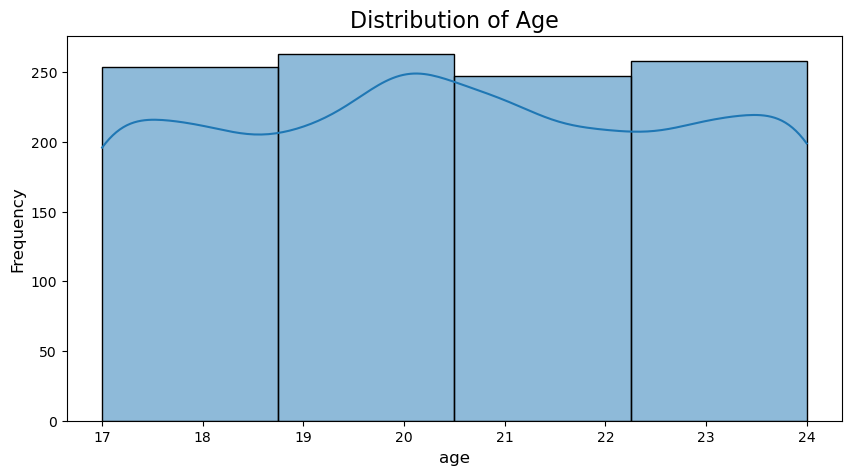

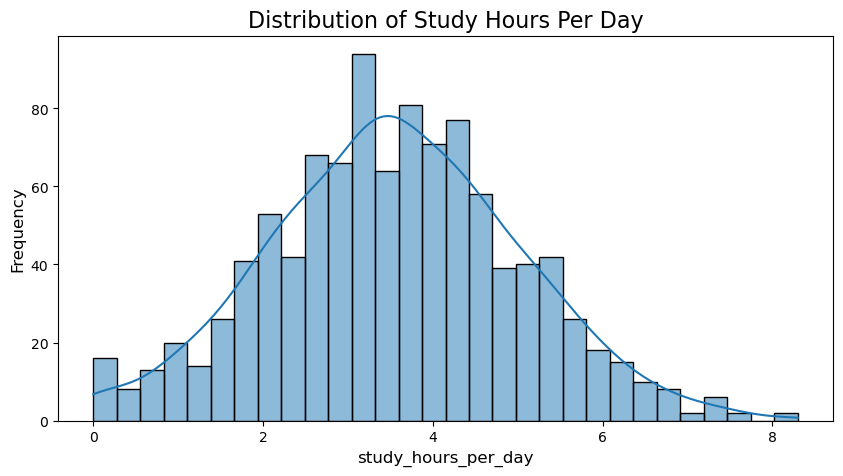

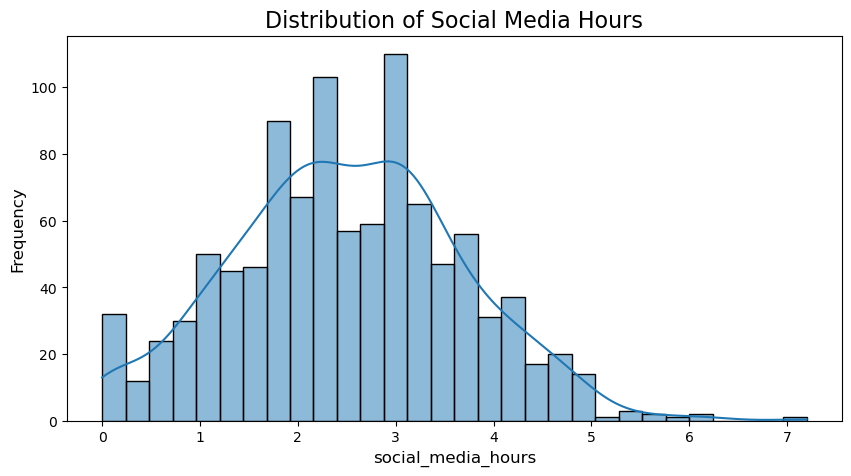

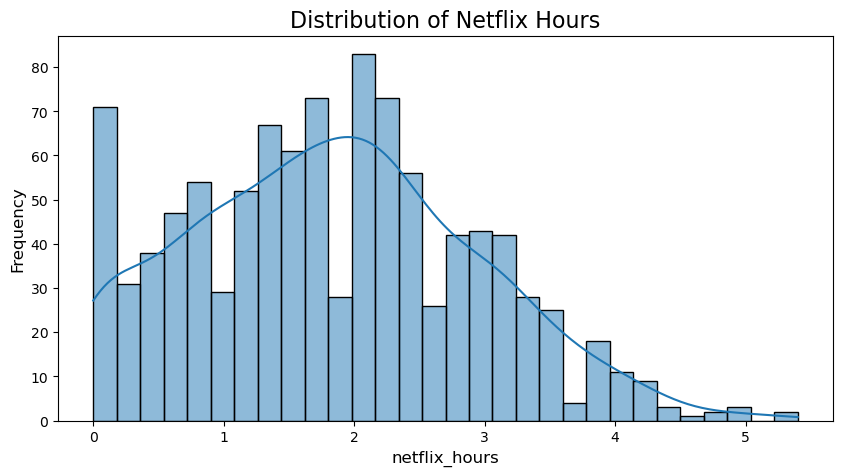

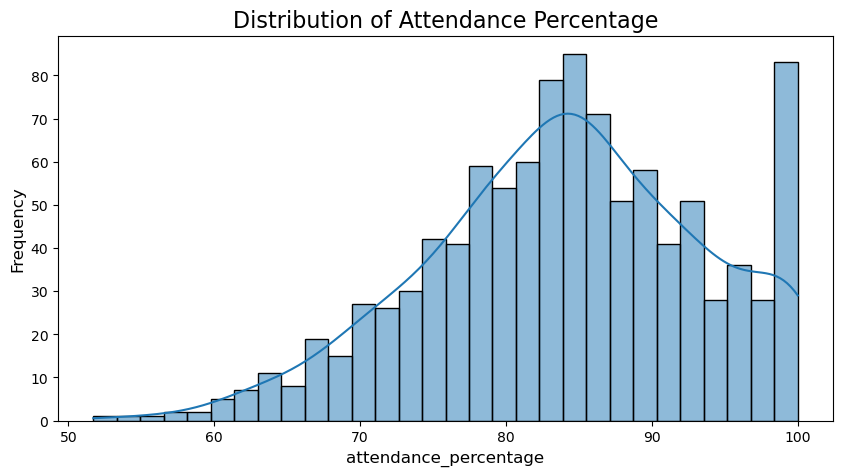

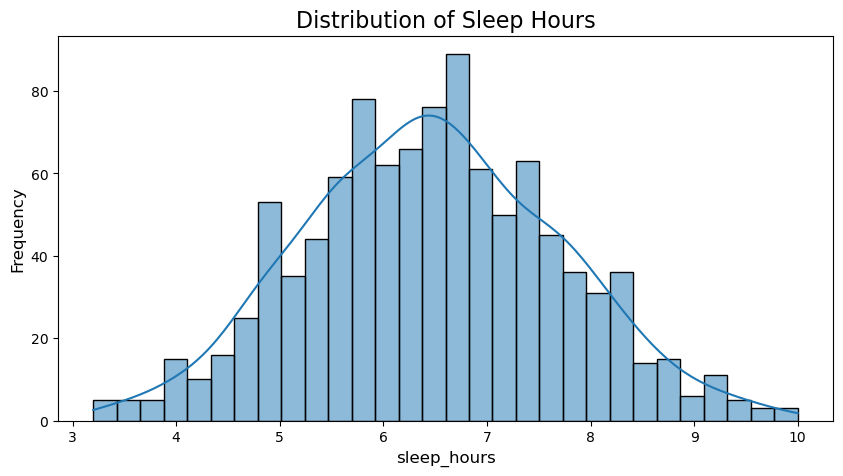

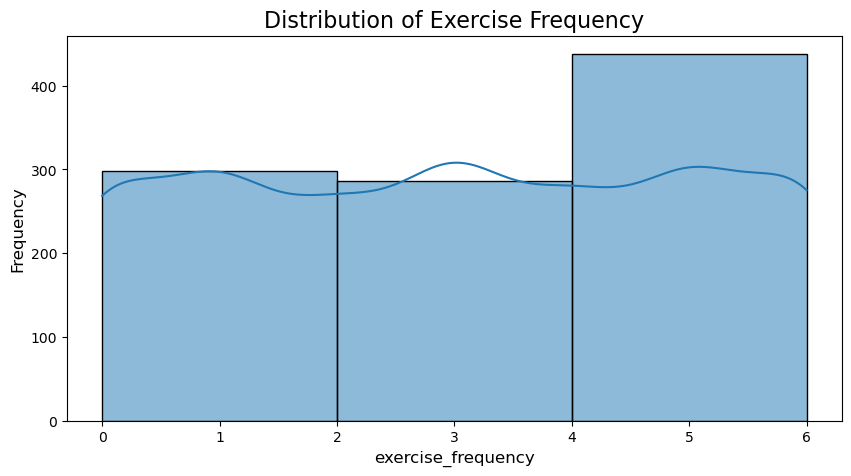

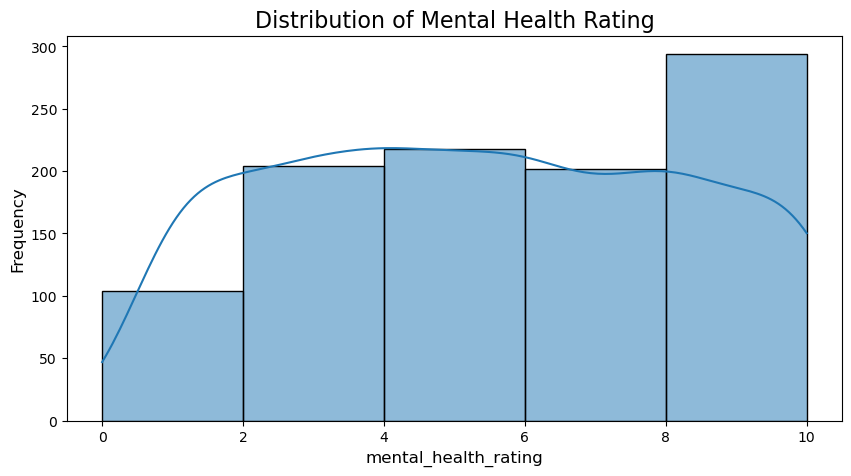

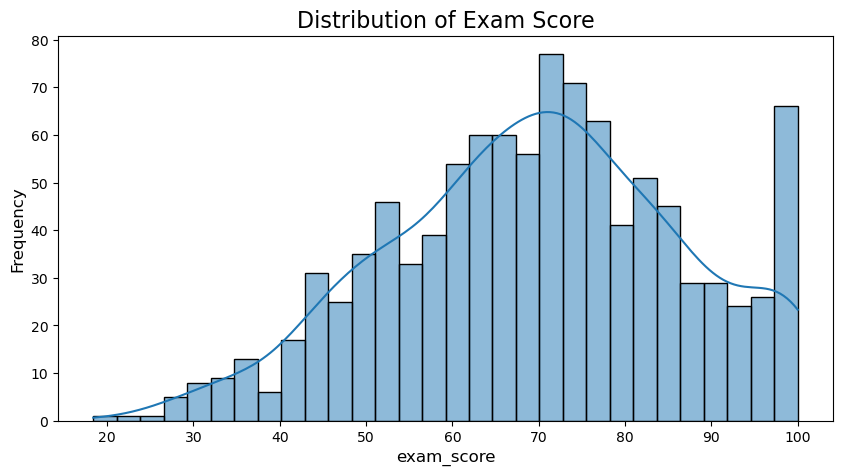

In [18]:
# 1. Distribution of Numerical Features (Histograms)
numerical_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
get_bins = lambda column_name: 4 if column_name == 'age' \
                          else 3 if column_name == 'exercise_frequency' \
                          else 5 if column_name == 'mental_health_rating' \
                          else 30
for col in numerical_cols:
    if col in df.columns:
        plt.figure(figsize=(10, 5))
        sns.histplot(df[col], kde=True, bins=get_bins(col))
        plt.title(f'Distribution of {format_title(col)}', fontsize=16)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.show()

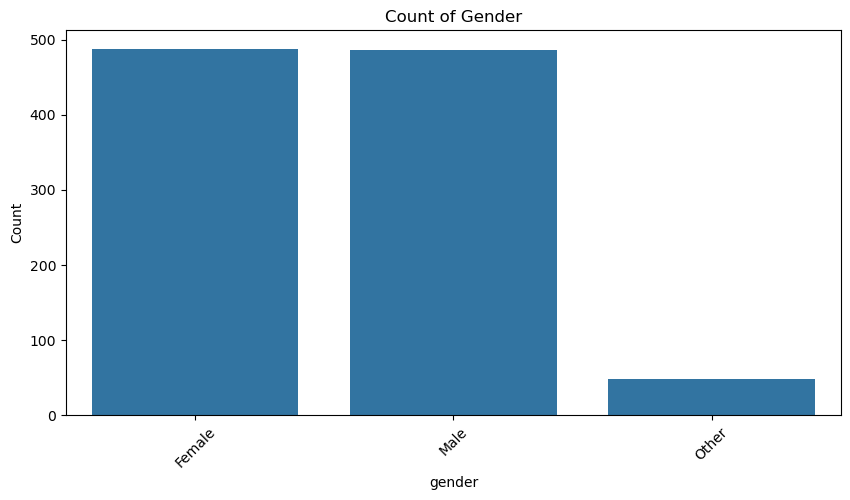

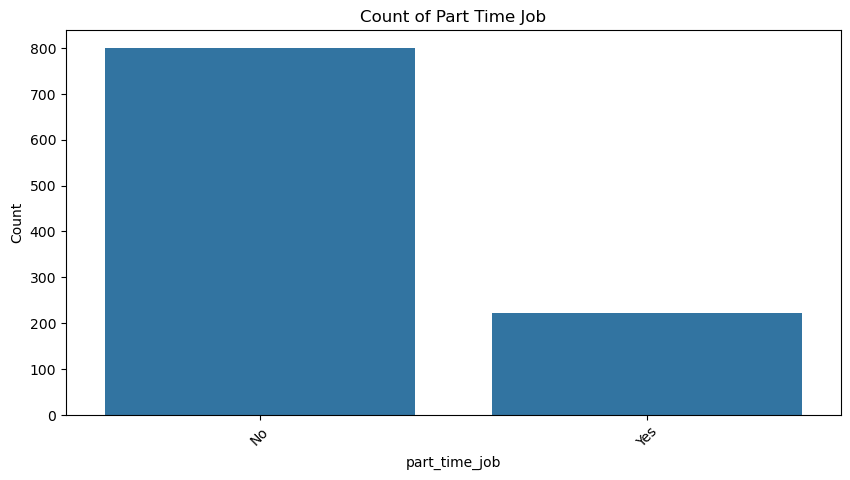

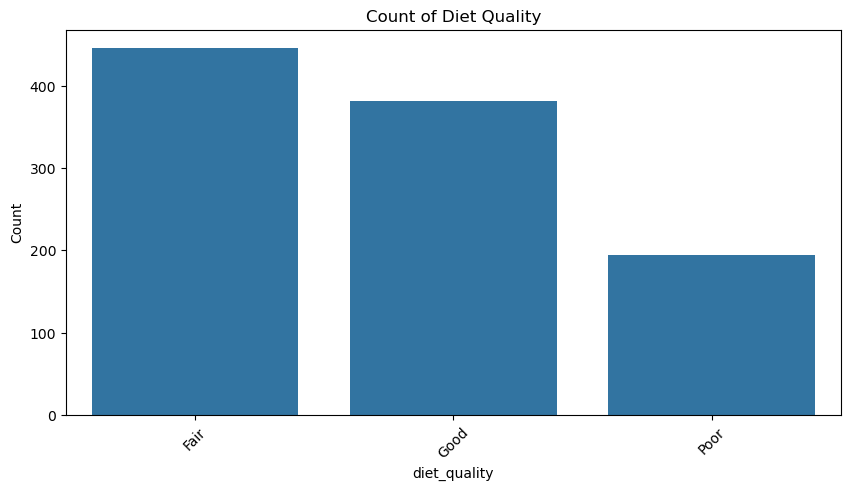

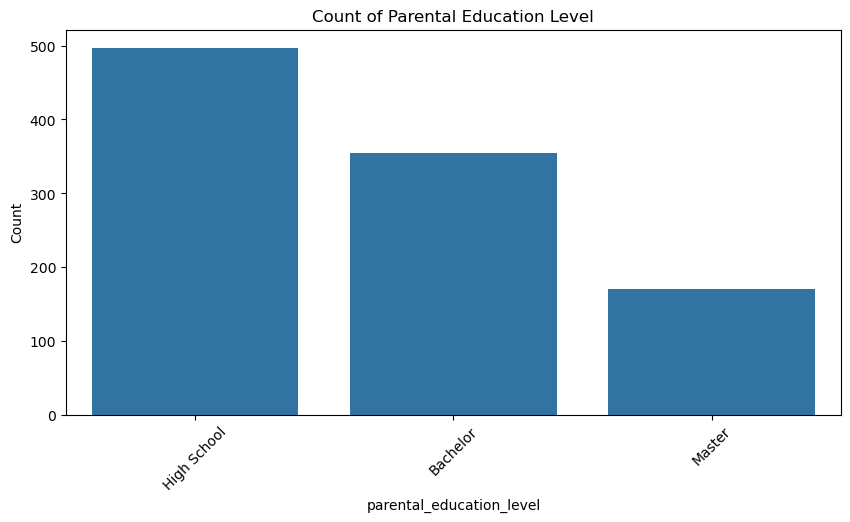

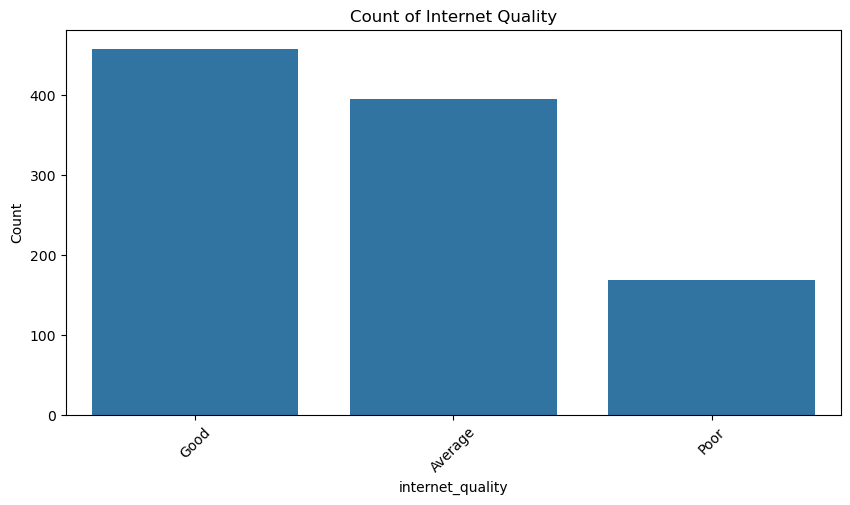

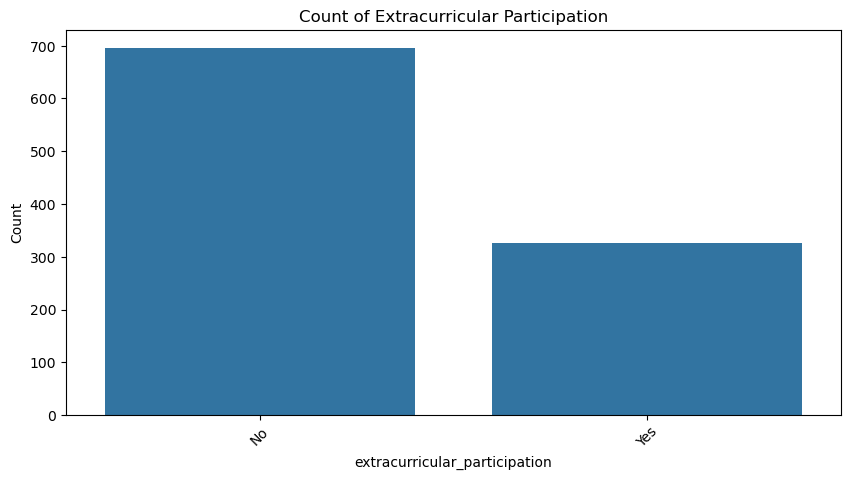

In [19]:
# 2. Frequency of Categorical Features (Count Plots)
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
categorical_cols.remove('student_id')  # Exclude 'student_id' from categorical columns for plotting
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count of {format_title(col)}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


## 2. Bivariate Analysis:
**Objective**: To explore the relationships between two variables and identify potential correlations or patterns.

Visualizations:
- **Scatter Plots**: To visualize the relationship between two numerical variables (e.g., hours studied vs. exam scores).
- **Box Plots by Category**: For categorical variables, box plots can show how numerical variables differ across different categories (e.g., scores by gender or class).

Exploring relationship between Study Hours and Exam Score...


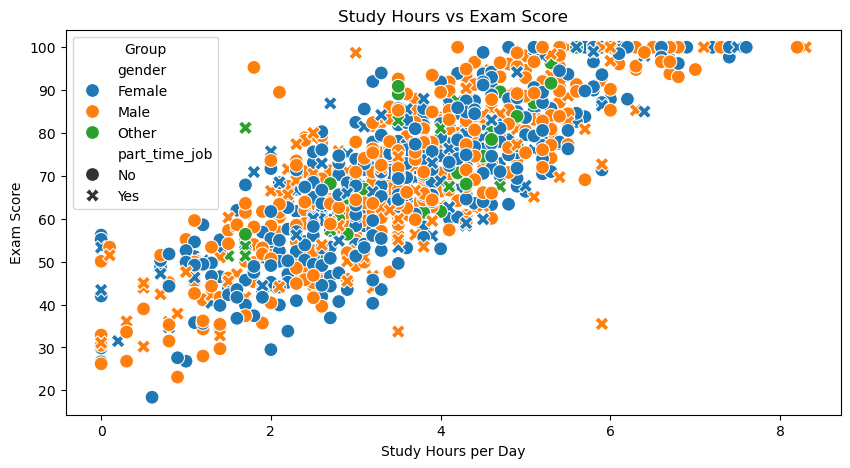

In [20]:
# 1. Relationship between Study Hours and Exam Score (Scatter Plot)
print("Exploring relationship between Study Hours and Exam Score...")
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score', hue='gender', style='part_time_job', s=100)
plt.title('Study Hours vs Exam Score')
plt.xlabel('Study Hours per Day')
plt.ylabel('Exam Score')
plt.legend(title='Group')
plt.show()


Exploring Exam Score distribution by Parental Education Level...


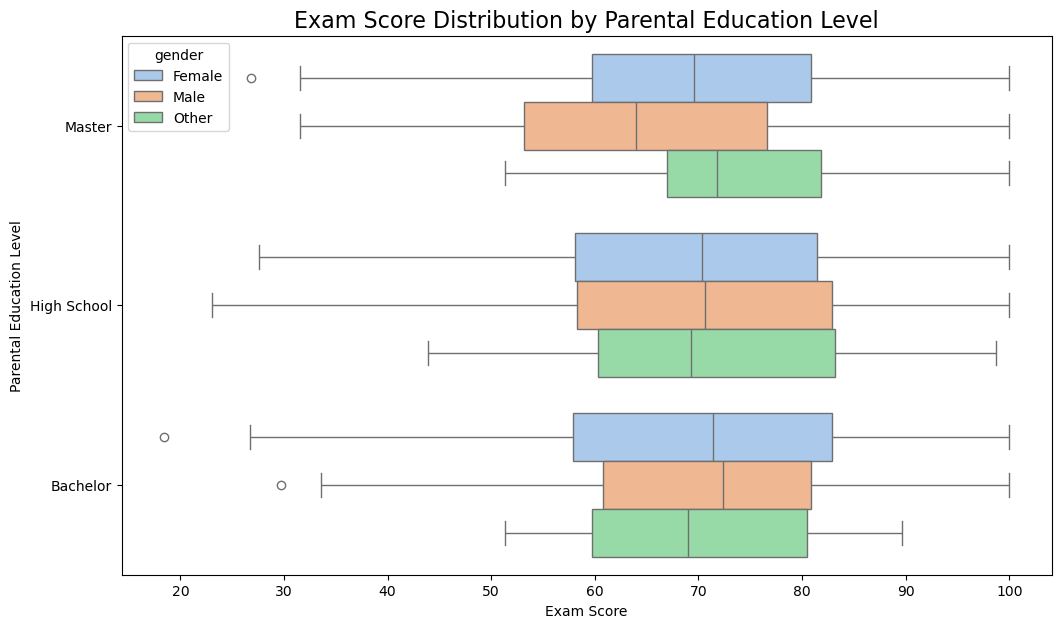

In [21]:
# 2. Exam Score Distribution by Parental Education (Box Plot)
print("\nExploring Exam Score distribution by Parental Education Level...")
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='exam_score', y='parental_education_level', palette='pastel', orient='h', hue="gender")
plt.title('Exam Score Distribution by Parental Education Level', size=16)
plt.xlabel('Exam Score')
plt.ylabel('Parental Education Level')
plt.show()

## 3. Multivariate Analysis:

**Objective**: To explore the relationships between two variables and identify potential correlations or patterns.

Visualizations:
- Heatmap: To visually assess the correlation between numerical variables in the dataset. It helps to identify patterns, clusters, and potential multicollinearity.
- Pair plot: To visually represent the pair-wise relationship between variables

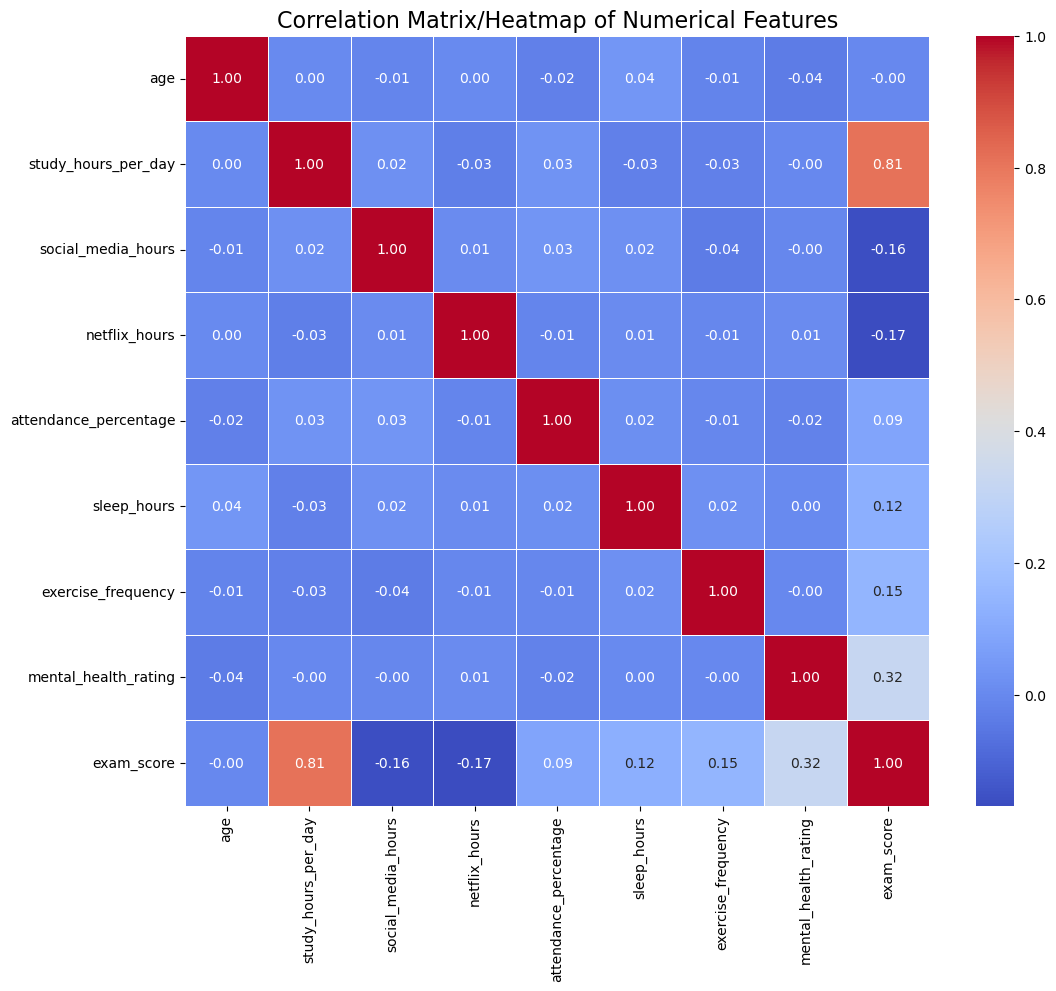

In [22]:
# 1. Correlation Matrix of Numerical Features (Heatmap)
plt.figure(figsize=(12, 10))
# Select only numerical columns for correlation calculation
numeric_cols = df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix/Heatmap of Numerical Features', size=16)
plt.show()

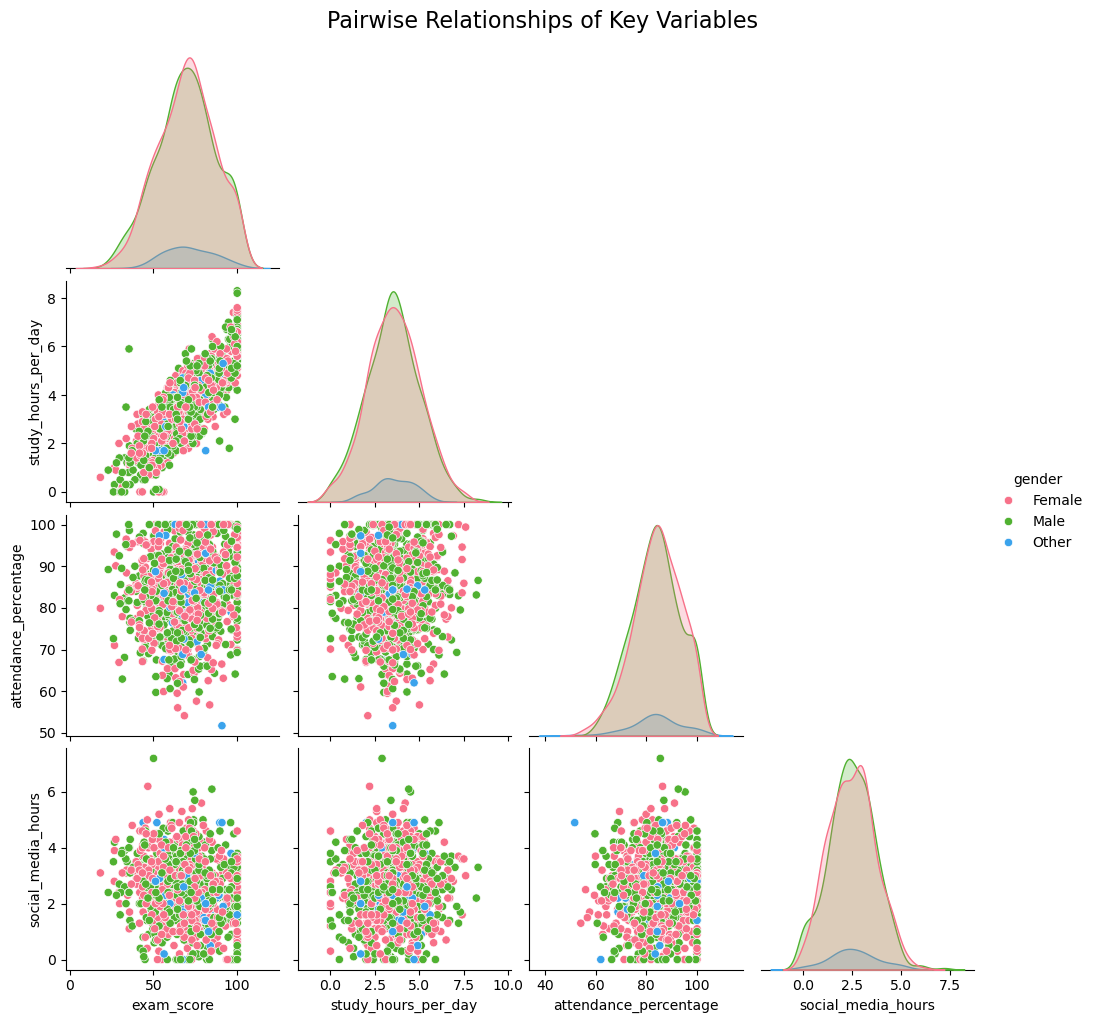

In [23]:
# 2. Pairwise Relationships (Pair Plot) - A powerful overview!
# We use a subset to keep the plot readable
pairplot_cols = ['exam_score', 'study_hours_per_day', 'attendance_percentage', 'social_media_hours', 'gender']
sns.pairplot(df[pairplot_cols], hue='gender', palette='husl', corner=True)
plt.suptitle('Pairwise Relationships of Key Variables', size=16, y=1.02)
plt.show()


# 📝 Summary of Analysis

The Jupyter Notebook (`EDA_Project_Group1.ipynb`) contains the following analytical steps:

* **Data Loading and Initial Inspection:** The dataset is loaded into a pandas DataFrame. Initial checks are performed to understand its structure, data types, and basic statistics.
* **Data Cleaning:**
  * **Handling Duplicates:** 14 duplicate records were identified and removed.
  * **Handling Missing Values:** Missing values were imputed to avoid data loss. Numerical columns (`age`, `study_hours_per_day`, etc.) were filled with the median, while categorical columns (`gender`, `part_time_job`, etc.) were filled with the mode.
  * **Dropping Columns:** Irrelevant columns (`country`, `zipcode`) were dropped from the DataFrame.
* **Data Visualization and EDA:**
  * **Univariate Analysis:** Histograms and bar plots were used to visualize the distributions of individual numerical and categorical features, respectively.
  * **Bivariate Analysis:** Scatter plots were created to explore the relationships between key features and `exam_score`.
  * **Outlier Detection:** Box plots were used to identify and understand the spread and outliers for numerical variables.
  * **Correlation Analysis:** A heatmap was generated to visualize the correlation matrix, providing a quick overview of the linear relationships between all numerical features.


# 🔑 Key Findings
In this final section, we summarize the most important insights derived from the exploratory data analysis (EDA) and provide a concise overview of the key trends, patterns, and relationships found within the dataset.

1. **Distribution of Exam Scores**:
    - The distribution of exam scores shows a left-skewed pattern, with the majority of students scoring in the mid-to-high range. This suggests that many students are able to manage their studies on average, while few students are able to achieve very high scores.
<br><br>
2. **Study Time vs. Exam Scores**:
    - A strong positive correlation was observed between hours studied and exam scores. This indicates that, generally, students who spent more time studying performed better in the exam.
    - The scatter plot clearly shows a linear trend, with most data points clustering around the line, though some students with high study hours did not score proportionally high, indicating that other factors may also influence exam performance.
<br><br>
3. **Effect of Gender on Exam Scores**:
    - The box plot comparison between genders shows no significant difference in exam scores across male and female students, indicating that gender does not appear to have a major impact on performance in this dataset.
    - Although the scores are fairly similar between genders, additional factors (e.g., study methods, environment) may still influence individual performance.
<br><br>
4. **Influence of Parental Background:**
    - It was found that students with parents holding higher education levels tended to achieve higher average exam scores.
    - This could be due to the ability of the parents being able to get more involved in the studies due to their own qualifications or due to other factors such a environement at home being one that emphasizes on education and will need to be futher analyzed to determine the nature of the impact
<br><br>
5. **Negative Impact of Screen Time:**
    - Hours spent on social_media and Netflix are negatively correlated with academic performance.
    - This indicates that more screentime and time spent on social media tends to have a detrimental impact on exam scored and a balance is required.
<br><br>
6. **Lifestyle Matters:**
    - A balanced lifestyle, including adequate sleep_hours and better diet_quality, shows a positive association with exam scores indicating that lifestyle choices impact the exam scores directly
<br><br>
7. **Correlation Between Numerical Variables**:
    - The heatmap of correlations revealed some interesting relationships:
    - A strong correlation between variables related to study time (e.g., hours studied) and exam scores, reinforcing the idea that dedicated study time leads to better performance.
    - Other numerical variables did not show significant correlations with exam scores, suggesting that these variables might not be as influential in predicting performance without further context.
<br><br>
8. **Missing Data**:
    - Missing values were effectively handled by filling numerical columns with the median and categorical columns with the mode. This ensured that no data was lost and that we could proceed with our analysis without issues related to incomplete data.
<br><br>
9. **Outliers and Data Quality**:
    - Some outliers were detected in the numerical variables, especially in exam scores and study hours. These outliers could represent exceptional students or data entry errors and may require further investigation to determine their cause.
    - The dataset is generally clean and ready for deeper analysis, such as predictive modeling or clustering.
<br><br>

**Conclusion**:

The exploratory analysis provides valuable insights into the dataset and identifies key patterns that can guide further analyses. The correlation between study time and exam performance is particularly notable, suggesting that future efforts should focus on understanding how different study habits or external factors influence exam results. Additionally, further analysis on the outliers and other potential predictive variables could help improve the accuracy of any models built on this data.
